**Using flyscan**


In [1]:
from bluesky import RunEngine

RE = RunEngine({})

from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

#Get the databroker https://gist.github.com/untzag/53281819709b1058c7708a250cbd3676
from databroker.v2 import temp
db = temp()

# Insert all metadata/data captured into db.
RE.subscribe(db.v1.insert)

1

In [2]:
from bessyii.plans.flying import flyscan
from bessyii_devices.flyer import MyMotor, MyDetector, BasicFlyer


#Flyer Sim
my_det = MyDetector('EMILEL:TestIOC00:', name='my_det')
fdev = MyMotor('EMILEL:TestIOC00:', name='fdev')
fdev.wait_for_connection()

In [3]:
#The flyscan plan has the following arguments
flyscan


<function bessyii.plans.flying.flyscan(detectors, flyer, start=None, stop=None, vel=0.2, delay=0.2, *, md=None)>



Transient Scan ID: 1     Time: 2021-09-03 13:58:16
Persistent Unique Scan ID: '7d08c764-ece6-4523-88e4-bf9a6f91ea52'
we've be asked to complete
New stream: 'primary'
+-----------+------------+------------+--------------+
|   seq_num |       time |   fdev_pos | my_det_count |
+-----------+------------+------------+--------------+
|         1 | 13:58:16.4 |          1 |        46404 |
|         2 | 13:58:16.7 |          1 |        48166 |
|         3 | 13:58:17.0 |          1 |        49310 |
|         4 | 13:58:17.2 |          1 |        50977 |
|         5 | 13:58:17.4 |          1 |        52052 |
|         6 | 13:58:17.7 |          1 |        53096 |
|         7 | 13:58:17.9 |          1 |        54600 |
|         8 | 13:58:18.1 |          1 |        55560 |
|         9 | 13:58:18.4 |          1 |        56930 |
|        10 | 13:58:18.6 |          1 |        57796 |
|        11 | 13:58:18.8 |          1 |        58622 |
|        12 | 13:58:19.1 |          1 |        59783 |
|      

('7d08c764-ece6-4523-88e4-bf9a6f91ea52',)

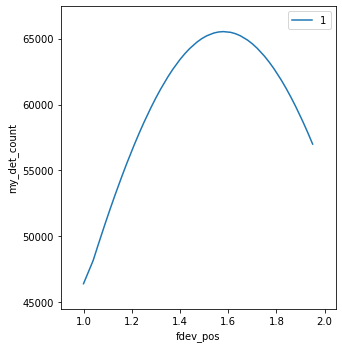

In [4]:
#Lets call it with a simulated device and simulated detector

#We can also call this method on the ue48_pgm device

RE(flyscan([my_det],fdev,1.0,2.0,0.1))